In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\Digirise Infolabs tasks\Level - 2\Stock Market Price Prediction\dataset_test.csv')
df.head()

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
0,CNDT,0.0,NASDAQ,2021,12,10,15,30,792397,5.41,...,0.2,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN
1,CNDT,1.0,NASDAQ,2021,12,9,15,30,1134639,5.46,...,0.2,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN
2,CNDT,2.0,NASDAQ,2021,12,8,15,30,939646,5.47,...,0.2,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN
3,CNDT,3.0,NASDAQ,2021,12,7,15,30,1301257,5.51,...,0.2,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN
4,CNDT,4.0,NASDAQ,2021,12,6,15,30,1090706,5365.00,...,0.2,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN


In [3]:
df.shape

(98192, 77)

In [4]:
df.describe()

,age,year,month,day,hour,minute,volume,high,low,close,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
count,98192.000000,98192.000000,98192.000000,98192.000000,98192.000000,98192.0,9.819200e+04,9.819200e+04,9.819200e+04,98192.000000,...,78692.000000,7.869200e+04,7.869200e+04,7.869200e+04,7.869200e+04,7.869200e+04,97022.0,97022.0,97022.000000,82202.000000
mean,125.426511,2020.944537,6.585710,15.646886,14.940525,30.0,1.253721e+06,3.629737e+03,3.248932e+03,243.539935,...,1.536986,1.536381e+06,1.916548e+04,1.227726e+06,-1.424871e+06,2.100079e+06,18.0,18.0,75.072267,0.056665
std,72.733097,0.228882,3.423395,8.728922,0.236513,0.0,6.292186e+06,4.186605e+04,3.582267e+04,3186.373805,...,3.574251,3.574079e+06,4.498380e+05,3.219572e+06,1.240939e+09,1.231001e+09,0.0,0.0,575.470165,0.231203
min,0.000000,2020.000000,1.000000,1.000000,14.000000,30.0,0.000000e+00,3.648000e-01,3.129000e-01,0.312900,...,0.000000,1.000000e+04,-9.260000e+06,7.211000e+02,-2.147447e+09,-2.147473e+09,18.0,18.0,0.000000,0.000000
25%,62.000000,2021.000000,4.000000,8.000000,15.000000,30.0,5.377325e+04,7.330000e+00,6.860000e+00,6.640000,...,0.300000,2.900000e+05,-4.000000e+04,7.248385e+04,-1.081544e+09,-1.050150e+09,18.0,18.0,0.568425,0.000000
50%,125.000000,2021.000000,7.000000,16.000000,15.000000,30.0,2.227805e+05,1.964000e+01,1.865000e+01,17.520000,...,0.700000,6.700000e+05,1.000000e+04,2.903338e+05,-7.320208e+06,3.106888e+06,18.0,18.0,0.957200,0.000000
75%,188.000000,2021.000000,10.000000,23.000000,15.000000,30.0,7.806512e+05,5.140000e+01,4.834257e+01,42.510000,...,1.500000,1.500000e+06,7.000000e+04,9.326882e+05,1.073657e+09,1.056888e+09,18.0,18.0,1.109375,0.000000
max,251.000000,2021.000000,12.000000,31.000000,15.000000,30.0,7.397306e+08,2.925075e+06,2.944895e+06,332989.000000,...,56.700000,5.668000e+07,9.800000e+06,5.207516e+07,2.147337e+09,2.147451e+09,18.0,18.0,70604.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98192 entries, 0 to 98191
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      98192 non-null  object 
 1   age                          98192 non-null  float64
 2   market                       98192 non-null  object 
 3   year                         98192 non-null  int64  
 4   month                        98192 non-null  int64  
 5   day                          98192 non-null  int64  
 6   hour                         98192 non-null  int64  
 7   minute                       98192 non-null  int64  
 8   volume                       98192 non-null  int64  
 9   high                         98192 non-null  float64
 10  low                          98192 non-null  float64
 11  close                        98192 non-null  float64
 12  open                         98192 non-null  float64
 13  AVERAGE_SMA_3_CL

In [7]:
print(df.columns)

Index(['company', 'age', 'market', 'year', 'month', 'day', 'hour', 'minute',
       'volume', 'high', 'low', 'close', 'open', 'AVERAGE_SMA_3_CLOSE',
       'EMA_3_CLOSE', 'MACD_3_CLOSE', 'AVERAGE_SMA_3_OPENHIGH',
       'EMA_3_OPENHIGH', 'MACD_3_OPENHIGH', 'AVERAGE_SMA_3_HIGHLOW',
       'EMA_3_HIGHLOW', 'MACD_3_HIGHLOW', 'AVERAGE_SMA_3_VOLUME',
       'EMA_3_VOLUME', 'MACD_3_VOLUME', 'AVERAGE_SMA_4_CLOSE', 'EMA_4_CLOSE',
       'MACD_4_CLOSE', 'AVERAGE_SMA_4_OPENHIGH', 'EMA_4_OPENHIGH',
       'MACD_4_OPENHIGH', 'AVERAGE_SMA_4_HIGHLOW', 'EMA_4_HIGHLOW',
       'MACD_4_HIGHLOW', 'AVERAGE_SMA_4_VOLUME', 'EMA_4_VOLUME',
       'MACD_4_VOLUME', 'AVERAGE_SMA_7_CLOSE', 'EMA_7_CLOSE', 'MACD_7_CLOSE',
       'AVERAGE_SMA_7_OPENHIGH', 'EMA_7_OPENHIGH', 'MACD_7_OPENHIGH',
       'AVERAGE_SMA_7_HIGHLOW', 'EMA_7_HIGHLOW', 'MACD_7_HIGHLOW',
       'AVERAGE_SMA_7_VOLUME', 'EMA_7_VOLUME', 'MACD_7_VOLUME',
       'AVERAGE_SMA_20_CLOSE', 'EMA_20_CLOSE', 'MACD_20_CLOSE',
       'AVERAGE_SMA_20_OPENHIGH

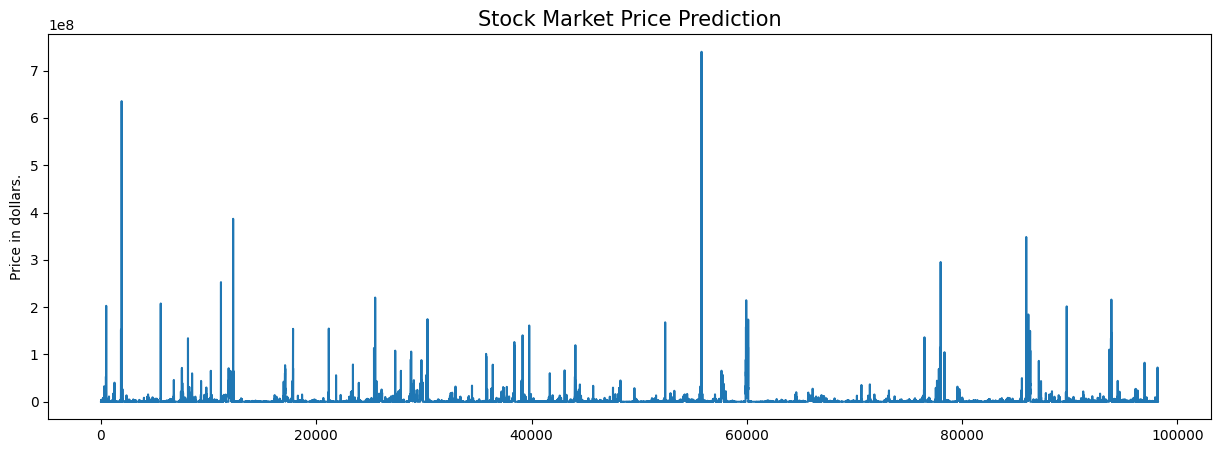

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df['volume'])
plt.title('Stock Market Price Prediction', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [13]:
df[df['volume'] == df['volume']].shape

(98192, 77)

In [14]:
df = df.drop(['volume'], axis=1)

In [15]:
df.isnull().sum()

company                            0
age                                0
market                             0
year                               0
month                              0
                               ...  
MACD_50_VOLUME                 19500
DAYS_UNTIL_END_OF_MONTH         1170
DAYS_UNTIL_END_OF_TRIMESTER     1170
DINAMIC3                        1170
TARGET                         15990
Length: 76, dtype: int64

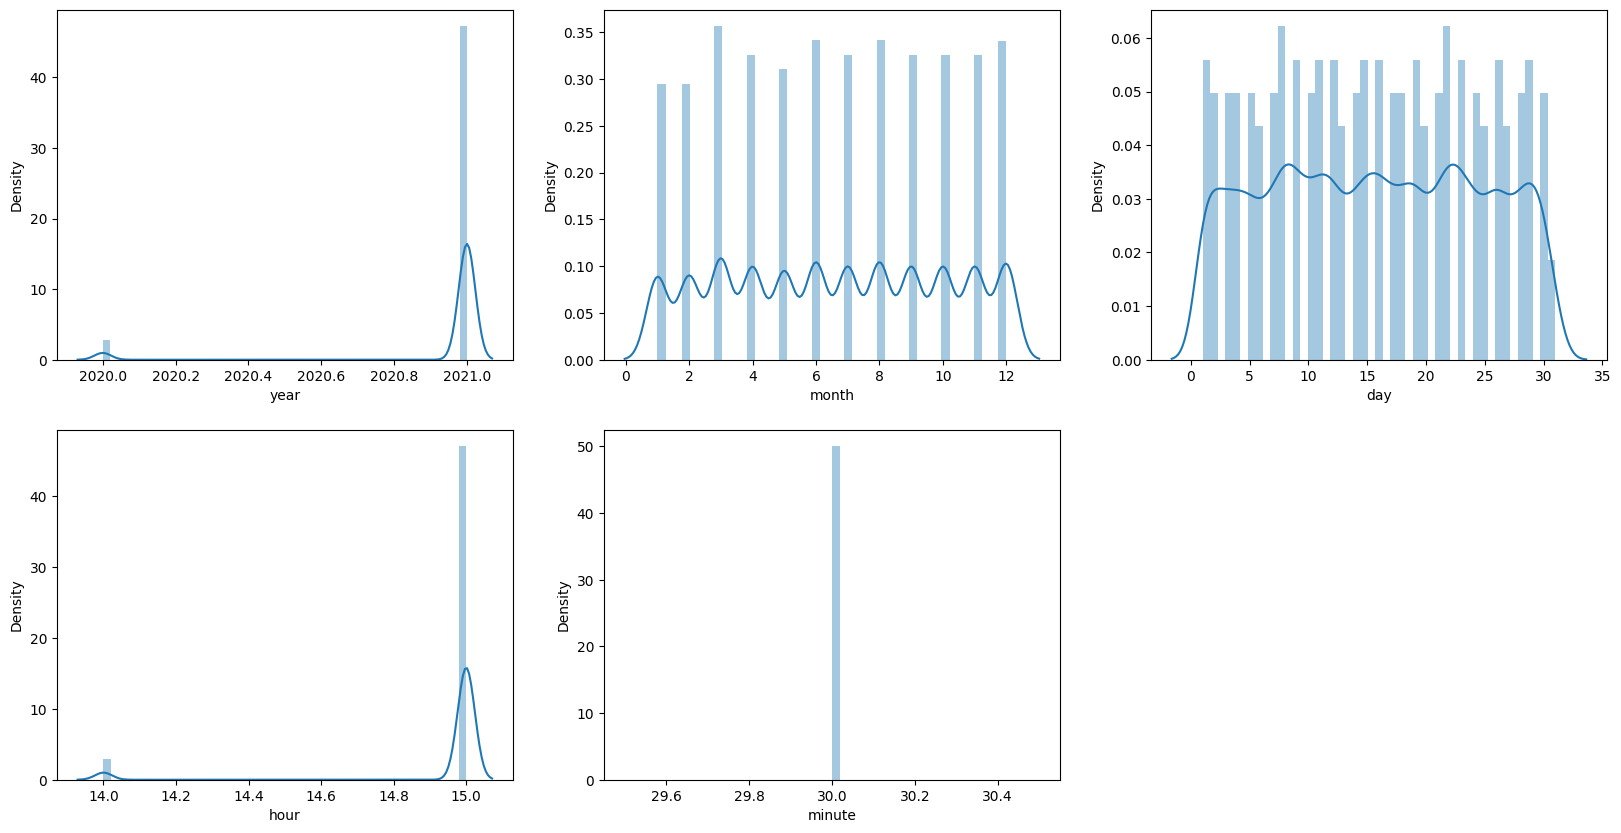

In [20]:
features = ['year', 'month', 'day', 'hour', 'minute']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


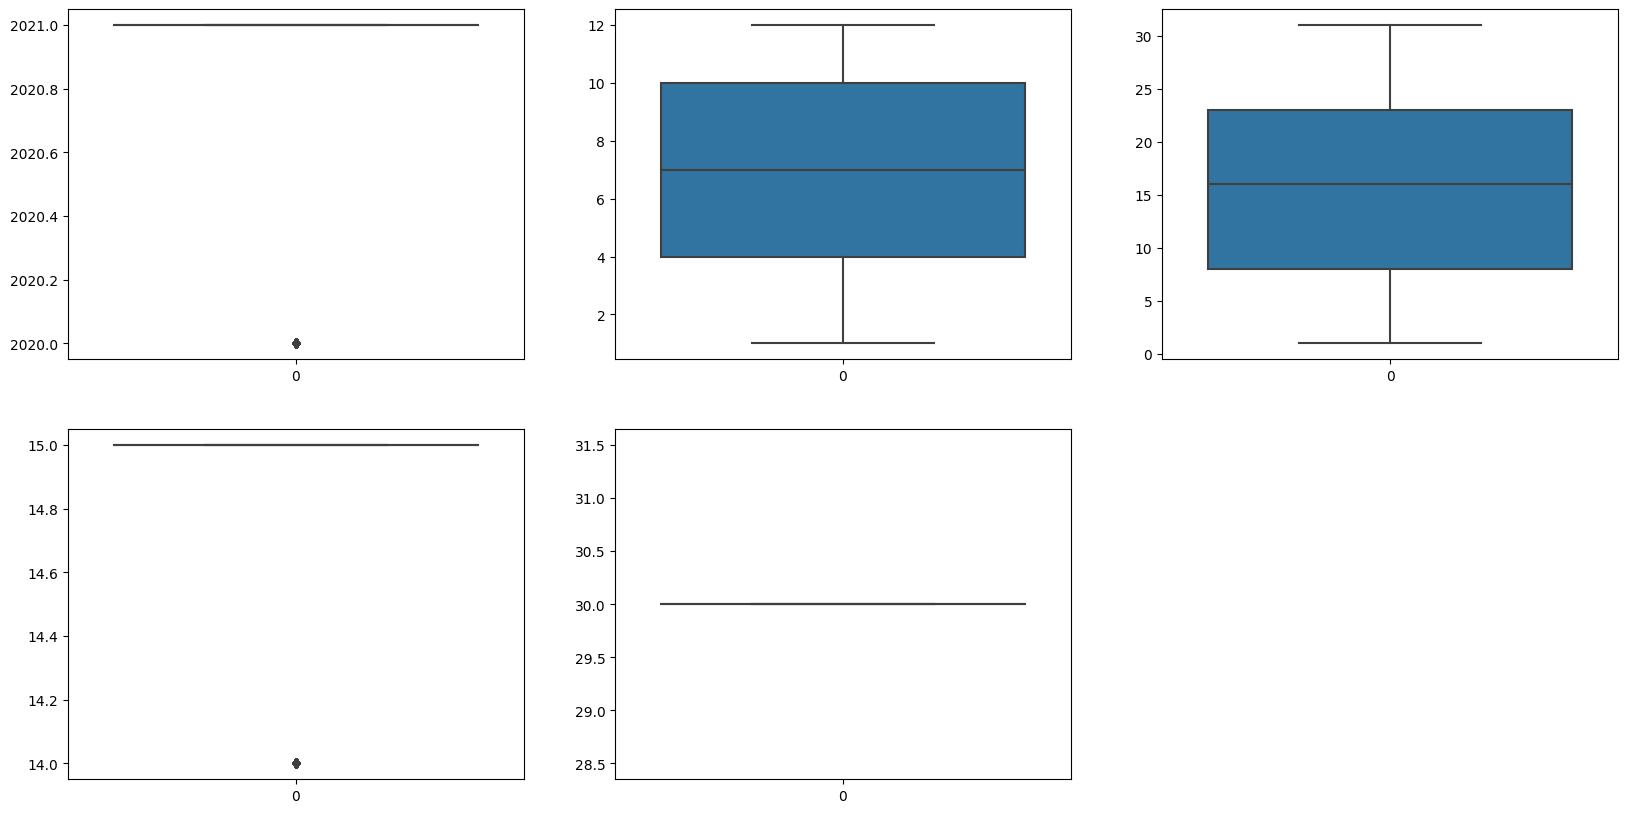

In [21]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [28]:
df['year'] = df['year'].astype(str)
splitted = df['year'].str.split('/', expand=True)
if len(splitted.columns) > 1:
    df['month'] = splitted[1].astype(int)
else:
    df['month'] = None
df['day'] = splitted[0].astype(int)

In [29]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,company,age,market,year,month,day,hour,minute,high,low,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,is_quarter_end
0,CNDT,0.0,NASDAQ,2021,None,2021,15,30,5.41,5305.00,...,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN,0
1,CNDT,1.0,NASDAQ,2021,None,2021,15,30,5.46,5.32,...,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN,0
2,CNDT,2.0,NASDAQ,2021,None,2021,15,30,5.47,5.32,...,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN,0
3,CNDT,3.0,NASDAQ,2021,None,2021,15,30,5.51,5.30,...,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN,0
4,CNDT,4.0,NASDAQ,2021,None,2021,15,30,5365.00,5.23,...,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN,0


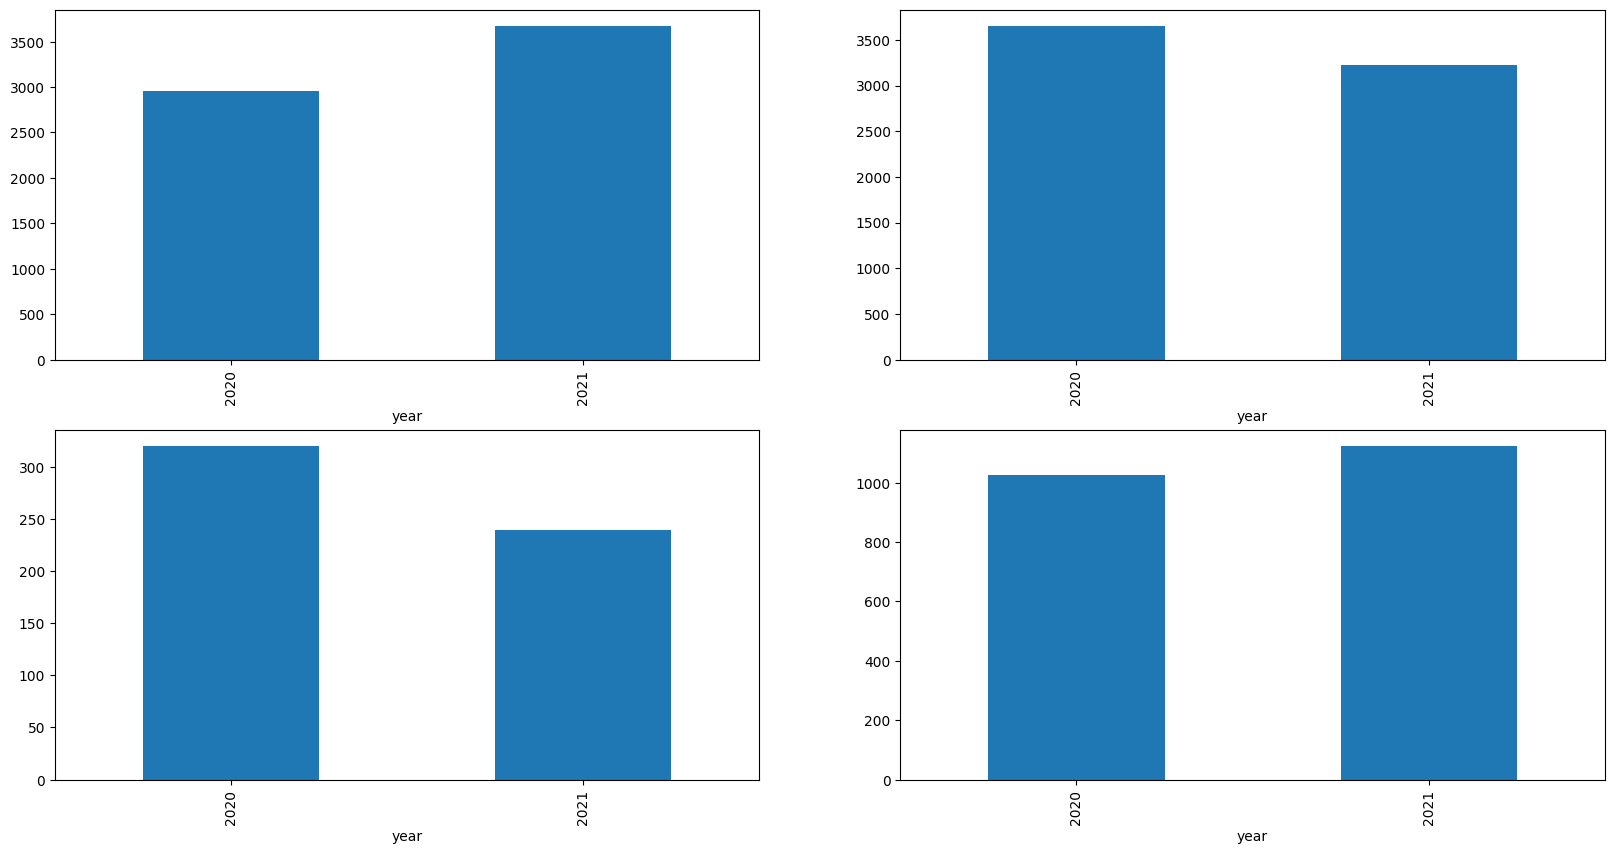

In [34]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['high', 'low', 'close', 'open']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [35]:
df.groupby('is_quarter_end').mean()

,age,day,hour,minute,high,low,close,open,AVERAGE_SMA_3_CLOSE,EMA_3_CLOSE,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
is_quarter_end,,,,,,,,,,,,,,,,,,,,,
0,125.426511,2020.944537,14.940525,30.0,3629.736967,3248.932191,243.539935,1117.625532,50.198676,3.470490e+07,...,1.536986,1.536381e+06,19165.480608,1.227726e+06,-1.424871e+06,2.100079e+06,18.0,18.0,75.072267,0.056665


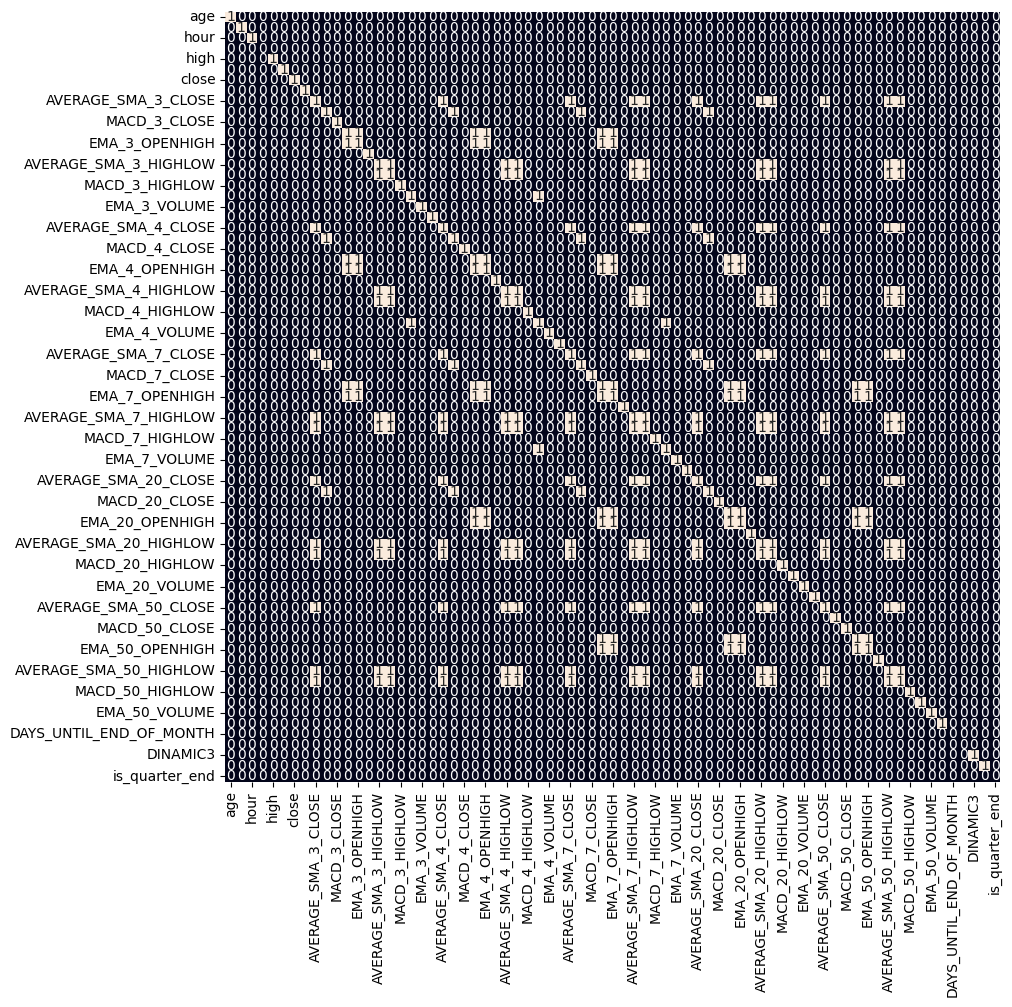

In [40]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()